In [57]:
import pandas as pd
from pandas import Series,DataFrame
import csv

In [58]:
train_df=pd.read_csv("train.csv",sep=',')


In [59]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
test_df=pd.read_csv("test.csv",sep=',')


In [61]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns


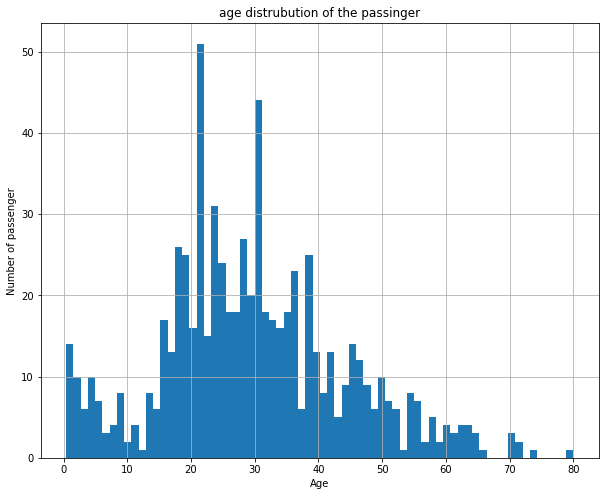

In [63]:
plt.figure(figsize=(10,8))
train_df['Age'].hist(bins=70)
plt.title('age distrubution of the passinger')
plt.xlabel('Age')
plt.ylabel('Number of passenger')
plt.show()

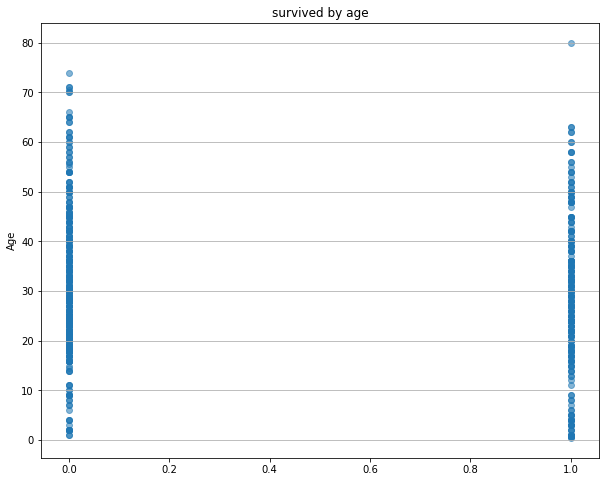

In [64]:
plt.figure(figsize=(10,8))
plt.scatter(train_df.Survived,train_df.Age,alpha=.55)
plt.ylabel('Age')
plt.grid(b=True,which='major',axis='y')
plt.title('survived by age')
plt.show()


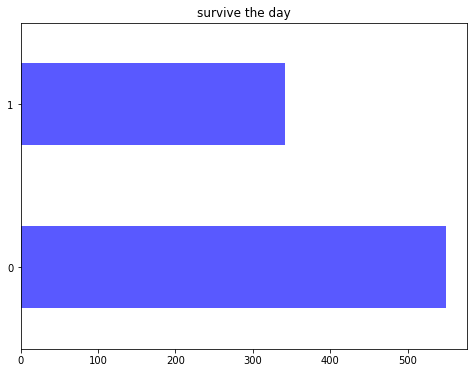

In [65]:
plt.figure(figsize=(8,6))
trian_df.Survived.value_counts().plot(kind='barh',color="blue",alpha=.65)
plt.title('survive the day')
plt.show()


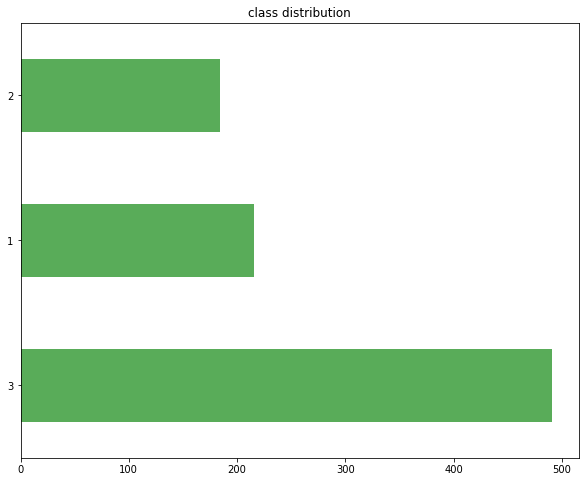

In [66]:
plt.figure(figsize=(10,8))
train_df.Pclass.value_counts().plot(kind='barh',color="g",alpha=.65)
plt.title('class distribution')
plt.show()

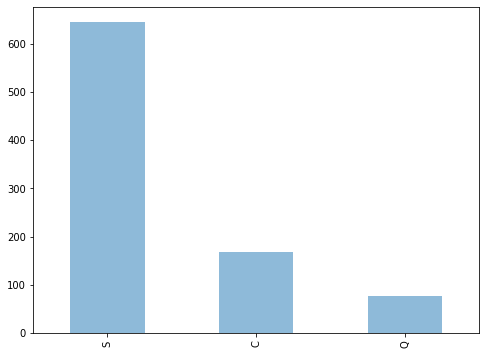

In [67]:
plt.figure(figsize=(8,6))
trian_df.Embarked.value_counts().plot(kind='bar',alpha=0.5)
plt.show()

In [108]:
#machine learning to load the trian the data file
def load_titanic_train_file():
    titanic_train_df=pd.read_csv('train.csv')
    cols=["Pclass","Sex","Age"]
    titanic_train_df["Sex"] = titanic_train_df["Sex"].apply(lambda sex:1 if sex=="male" else 0)
    titanic_train_df["Age"] = titanic_train_df["Age"].fillna(titanic_train_df["Age"].mean())
    titanic_train_df["Fare"] = titanic_train_df["Fare"].fillna(titanic_train_df["Fare"].mean())
    survived = titanic_train_df["Survived"].values
    data = titanic_train_df[cols].values
    return survived,data
    

In [111]:
#machine learning to load the trian the data file
def load_titanic_test_file():
    titanic_test_df=pd.read_csv('test.csv')
    cols=["Pclass","Sex","Age"]
    titanic_test_df["Sex"] = titanic_test_df["Sex"].apply(lambda sex:1 if sex=="male" else 0)
    titanic_test_df["Age"] = titanic_test_df["Age"].fillna(titanic_test_df["Age"].mean())
    titanic_test_df["Fare"] = titanic_test_df["Fare"].fillna(titanic_test_df["Fare"].mean())
    data = titanic_test_df[cols].values
    return data
    

In [112]:
survived, data_train=load_titanic_train_file()
data_test = load_titanic_test_file()

In [113]:
survived, data_train=load_titanic_train_file()
data_test = load_titanic_test_file()

In [114]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [117]:
model.fit(data_train,survived)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
predict =model.predict(data_test)

In [119]:
predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [120]:
new_test_prediction_set = ([1,1,22],[3,0,26],[1,0,38])

In [121]:
model.predict(new_test_prediction_set)

array([0, 1, 1], dtype=int64)

In [123]:
#machine learning model predict
import pickle as pkl

In [124]:
persist_model = pkl.dumps(model)

In [126]:
persist_model

b'\x80\x03csklearn.linear_model.logistic\nLogisticRegression\nq\x00)\x81q\x01}q\x02(X\x07\x00\x00\x00penaltyq\x03X\x02\x00\x00\x00l2q\x04X\x04\x00\x00\x00dualq\x05\x89X\x03\x00\x00\x00tolq\x06G?\x1a6\xe2\xeb\x1cC-X\x01\x00\x00\x00Cq\x07G?\xf0\x00\x00\x00\x00\x00\x00X\r\x00\x00\x00fit_interceptq\x08\x88X\x11\x00\x00\x00intercept_scalingq\tK\x01X\x0c\x00\x00\x00class_weightq\nNX\x0c\x00\x00\x00random_stateq\x0bNX\x06\x00\x00\x00solverq\x0cX\x04\x00\x00\x00warnq\rX\x08\x00\x00\x00max_iterq\x0eKdX\x0b\x00\x00\x00multi_classq\x0fh\rX\x07\x00\x00\x00verboseq\x10K\x00X\n\x00\x00\x00warm_startq\x11\x89X\x06\x00\x00\x00n_jobsq\x12NX\x08\x00\x00\x00l1_ratioq\x13NX\x08\x00\x00\x00classes_q\x14cnumpy.core.multiarray\n_reconstruct\nq\x15cnumpy\nndarray\nq\x16K\x00\x85q\x17C\x01bq\x18\x87q\x19Rq\x1a(K\x01K\x02\x85q\x1bcnumpy\ndtype\nq\x1cX\x02\x00\x00\x00i8q\x1dK\x00K\x01\x87q\x1eRq\x1f(K\x03X\x01\x00\x00\x00<q NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00tq!b\x89C\x10\x00\x00\x00\x00\x00\x00\x00\x00\x

In [129]:
from sklearn.externals import joblib
joblib.dump(model,'regmodel.pkl')

['regmodel.pkl']

In [130]:
new_model = joblib.load('regmodel.pkl')

In [131]:
new_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
new_model.predict(new_test_prediction_set)

array([0, 1, 1], dtype=int64)